#Data Pre-Processing

In [1]:
import pandas as pd

# Read CO2 Emissions data
co2_url = 'https://raw.githubusercontent.com/osanan25/ClimateChangePrediction/main/CO2Data.csv'
co2Data = pd.read_csv(co2_url)

# Read Greenhouse Gases data
gg_url = 'https://raw.githubusercontent.com/osanan25/ClimateChangePrediction/main/GreenhouseGasses.csv'
ggData = pd.read_csv(gg_url)

# Read Surface Temperature Change data
temp_url = 'https://raw.githubusercontent.com/osanan25/ClimateChangePrediction/main/TempData.csv'
tempData = pd.read_csv(temp_url)

In [2]:
ggData.head()

,Year,CO2,CH4,N2O,CFC*,HCFCs,HFCs*,Total,Total.1,1990 = 1,change **
0,1979,1.027,0.406,0.104,0.154,0.008,0.001,1.700,382,0.785,NaN
1,1980,1.060,0.413,0.104,0.163,0.009,0.001,1.749,386,0.808,2.3
2,1981,1.079,0.420,0.107,0.172,0.009,0.001,1.788,388,0.825,1.8
3,1982,1.091,0.426,0.111,0.180,0.010,0.001,1.819,391,0.840,1.5
4,1983,1.117,0.429,0.113,0.190,0.011,0.001,1.861,394,0.859,1.9


In [3]:
tempData.head()

,Year,Value
0,1850,-0.22
1,1851,-0.19
2,1852,-0.38
3,1853,-0.18
4,1854,-0.22


In [4]:
tempData.tail()

,Year,Value
169,2019,1.05
170,2020,1.11
171,2021,0.79
172,2022,0.90
173,2023,1.00


In [5]:
co2Data.head()

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


In [6]:
ggData.describe()

,Year,CO2,CH4,N2O,CFC*,HCFCs,HFCs*,Total,Total.1,1990 = 1,change **
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,44.000000
mean,2000.911111,1.570311,0.475667,0.154622,0.251378,0.034044,0.014711,2.500689,445.244444,1.154733,1.677273
std,12.990945,0.343749,0.030469,0.032262,0.034604,0.017099,0.014129,0.452937,37.559744,0.209166,0.377177
min,1979.000000,1.027000,0.406000,0.104000,0.154000,0.008000,0.001000,1.700000,382.000000,0.785000,0.700000
25%,1990.000000,1.294000,0.459000,0.129000,0.246000,0.018000,0.003000,2.166000,417.000000,1.000000,1.500000
50%,2001.000000,1.538000,0.481000,0.153000,0.263000,0.034000,0.009000,2.494000,443.000000,1.152000,1.700000
75%,2012.000000,1.848000,0.494000,0.181000,0.276000,0.051000,0.025000,2.860000,475.000000,1.321000,1.825000
max,2021.000000,2.140000,0.526000,0.210000,0.282000,0.058000,0.044000,3.222000,508.000000,1.488000,2.700000


In [7]:
tempData.describe()

,Year,Value
count,174.000000,174.000000
mean,1936.500000,0.050115
std,50.373604,0.374245
min,1850.000000,-0.590000
25%,1893.250000,-0.210000
50%,1936.500000,-0.070000
75%,1979.750000,0.237500
max,2023.000000,1.140000


In [8]:
co2Data.describe()

,year,mean,unc
count,64.000000,64.000000,64.00
mean,1990.500000,358.295156,0.12
std,18.618987,30.583707,0.00
min,1959.000000,315.980000,0.12
25%,1974.750000,330.895000,0.12
50%,1990.500000,355.075000,0.12
75%,2006.250000,382.572500,0.12
max,2022.000000,418.560000,0.12


In [9]:
# Check for missing values in each dataset
co2_missing_values = co2Data.isnull().sum()
gg_missing_values = ggData.isnull().sum()
temp_missing_values = tempData.isnull().sum()

# Print the number of missing values in each dataset
print("CO2 Emissions - Missing Values:")
print(co2_missing_values)

print("\nGreenhouse Gases - Missing Values:")
print(gg_missing_values)

print("\nSurface Temperature Change - Missing Values:")
print(temp_missing_values)

CO2 Emissions - Missing Values:
year    0
mean    0
unc     0
dtype: int64

Greenhouse Gases - Missing Values:
Year         0
CO2          0
CH4          0
N2O          0
CFC*         0
HCFCs        0
HFCs*        0
Total        0
Total.1      0
1990 = 1     0
change **    1
dtype: int64

Surface Temperature Change - Missing Values:
Year     0
Value    0
dtype: int64


In [10]:
co2Data = co2Data.fillna(co2Data.mean())
ggData = ggData.fillna(ggData.mean())
tempData = tempData.fillna(tempData.mean())

In [11]:
# rename 'year' column in co2Data
co2Data.rename(columns={'year': 'Year'}, inplace=True)

# filter dataframes to include data from 1974 to 2021 only
ggData = ggData[(ggData['Year'] >= 1979) & (ggData['Year'] <= 2021)]
tempData = tempData[(tempData['Year'] >= 1979) & (tempData['Year'] <= 2021)]
co2Data = co2Data[(co2Data['Year'] >= 1979) & (co2Data['Year'] <= 2021)]

# merge the dataframes
df = pd.merge(ggData, tempData, on='Year')
df = pd.merge(df, co2Data, on='Year')

In [12]:
# Define a dictionary with old column names as keys and new column names as values
rename_dict = {
    'Year': 'Year',
    'CO2': 'CO2',
    'CH4': 'Methane',
    'N2O': 'Nitrous_Oxide',
    'CFC*': 'CFCs',
    'HCFCs': 'Hydrochlorofluorocarbons',
    'HFCs*': 'Hydrofluorocarbons',
    'Total': 'Total_Greenhouse_Gases_Heat',
    'Total.1': 'Total_Greenhouse_Gases_Concentration',
    '1990 = 1': 'Increase_Since_1990',
    'change **': 'Change_In_Temperature_Since_1967',
    'Value': 'Surface_Temperature',
    'mean': 'CO2_Concentration',
    'unc': 'CO2_Uncertainty'
}

# Rename the columns
df.rename(columns=rename_dict, inplace=True)
df = df.drop(columns=['CO2_Uncertainty'])

In [13]:
df.describe()

,Year,CO2,Methane,Nitrous_Oxide,CFCs,Hydrochlorofluorocarbons,Hydrofluorocarbons,Total_Greenhouse_Gases_Heat,Total_Greenhouse_Gases_Concentration,Increase_Since_1990,Change_In_Temperature_Since_1967,Surface_Temperature,CO2_Concentration
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,2000.911111,1.570311,0.475667,0.154622,0.251378,0.034044,0.014711,2.500689,445.244444,1.154733,1.677273,0.576444,374.498444
std,12.990945,0.343749,0.030469,0.032262,0.034604,0.017099,0.014129,0.452937,37.559744,0.209166,0.372866,0.276703,24.544047
min,1979.000000,1.027000,0.406000,0.104000,0.154000,0.008000,0.001000,1.700000,382.000000,0.785000,0.700000,0.100000,336.840000
25%,1990.000000,1.294000,0.459000,0.129000,0.246000,0.018000,0.003000,2.166000,417.000000,1.000000,1.500000,0.370000,354.450000
50%,2001.000000,1.538000,0.481000,0.153000,0.263000,0.034000,0.009000,2.494000,443.000000,1.152000,1.700000,0.570000,371.320000
75%,2012.000000,1.848000,0.494000,0.181000,0.276000,0.051000,0.025000,2.860000,475.000000,1.321000,1.800000,0.790000,394.060000
max,2021.000000,2.140000,0.526000,0.210000,0.282000,0.058000,0.044000,3.222000,508.000000,1.488000,2.700000,1.140000,416.450000


In [14]:
df.isnull().sum()

Year                                    0
CO2                                     0
Methane                                 0
Nitrous_Oxide                           0
CFCs                                    0
Hydrochlorofluorocarbons                0
Hydrofluorocarbons                      0
Total_Greenhouse_Gases_Heat             0
Total_Greenhouse_Gases_Concentration    0
Increase_Since_1990                     0
Change_In_Temperature_Since_1967        0
Surface_Temperature                     0
CO2_Concentration                       0
dtype: int64

In [15]:
df_list = df.values.tolist()
df_list.insert(0, list(df.columns))

In [16]:
df.head()

,Year,CO2,Methane,Nitrous_Oxide,CFCs,Hydrochlorofluorocarbons,Hydrofluorocarbons,Total_Greenhouse_Gases_Heat,Total_Greenhouse_Gases_Concentration,Increase_Since_1990,Change_In_Temperature_Since_1967,Surface_Temperature,CO2_Concentration
0,1979,1.027,0.406,0.104,0.154,0.008,0.001,1.700,382,0.785,1.677273,0.10,336.84
1,1980,1.060,0.413,0.104,0.163,0.009,0.001,1.749,386,0.808,2.300000,0.33,338.76
2,1981,1.079,0.420,0.107,0.172,0.009,0.001,1.788,388,0.825,1.800000,0.38,340.12
3,1982,1.091,0.426,0.111,0.180,0.010,0.001,1.819,391,0.840,1.500000,0.22,341.48
4,1983,1.117,0.429,0.113,0.190,0.011,0.001,1.861,394,0.859,1.900000,0.25,343.15


In [17]:
df.tail()

,Year,CO2,Methane,Nitrous_Oxide,CFCs,Hydrochlorofluorocarbons,Hydrofluorocarbons,Total_Greenhouse_Gases_Heat,Total_Greenhouse_Gases_Concentration,Increase_Since_1990,Change_In_Temperature_Since_1967,Surface_Temperature,CO2_Concentration
40,2019,2.079,0.516,0.202,0.250,0.057,0.039,3.144,500,1.452,1.8,1.05,411.66
41,2020,2.111,0.520,0.206,0.248,0.057,0.041,3.183,504,1.470,1.8,1.11,414.24
42,2020,2.111,0.520,0.206,0.248,0.057,0.041,3.183,504,1.470,1.8,1.11,414.24
43,2021,2.140,0.526,0.210,0.246,0.058,0.044,3.222,508,1.488,1.8,0.79,416.45
44,2021,2.140,0.526,0.210,0.246,0.058,0.044,3.222,508,1.488,1.8,0.79,416.45


In [18]:
data=df.copy()

In [19]:
data.head()

,Year,CO2,Methane,Nitrous_Oxide,CFCs,Hydrochlorofluorocarbons,Hydrofluorocarbons,Total_Greenhouse_Gases_Heat,Total_Greenhouse_Gases_Concentration,Increase_Since_1990,Change_In_Temperature_Since_1967,Surface_Temperature,CO2_Concentration
0,1979,1.027,0.406,0.104,0.154,0.008,0.001,1.700,382,0.785,1.677273,0.10,336.84
1,1980,1.060,0.413,0.104,0.163,0.009,0.001,1.749,386,0.808,2.300000,0.33,338.76
2,1981,1.079,0.420,0.107,0.172,0.009,0.001,1.788,388,0.825,1.800000,0.38,340.12
3,1982,1.091,0.426,0.111,0.180,0.010,0.001,1.819,391,0.840,1.500000,0.22,341.48
4,1983,1.117,0.429,0.113,0.190,0.011,0.001,1.861,394,0.859,1.900000,0.25,343.15


# Data Visualization

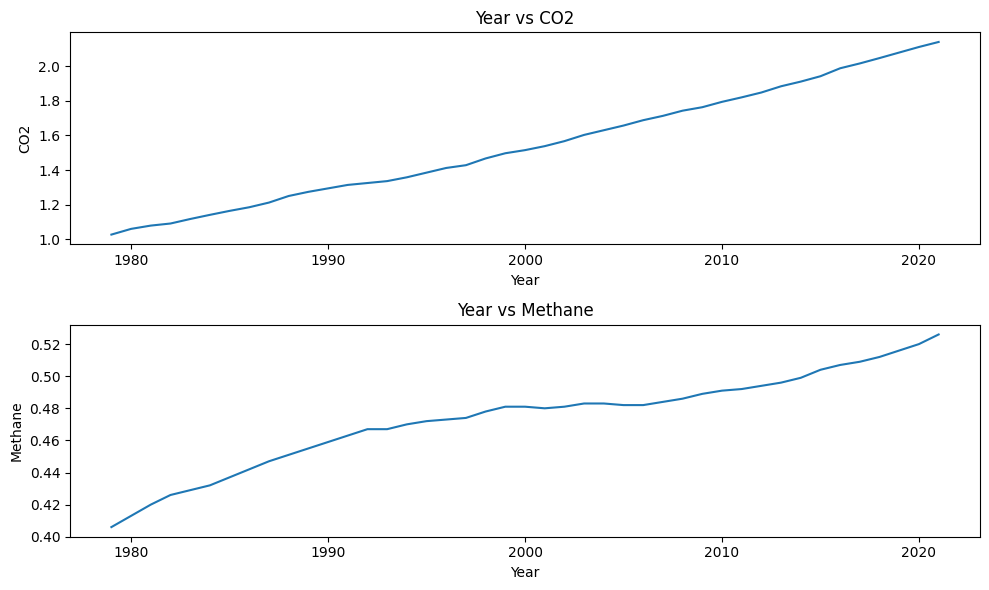

In [20]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6))

# Year vs. CO2
plt.subplot(2, 1, 1)
plt.plot(data['Year'], data['CO2'])
plt.title('Year vs CO2')
plt.xlabel('Year')
plt.ylabel('CO2')

# Year vs. Methane
plt.subplot(2, 1, 2)
plt.plot(data['Year'], data['Methane'])
plt.title('Year vs Methane')
plt.xlabel('Year')
plt.ylabel('Methane')

plt.tight_layout()
plt.show()


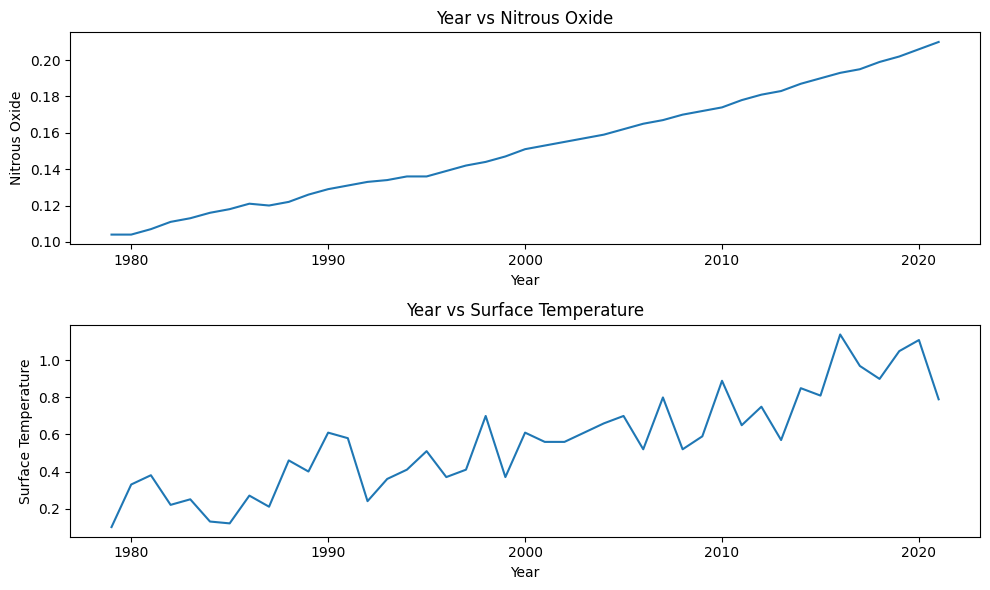

In [21]:
plt.figure(figsize=(10, 6))

# Year vs. Nitrous Oxide
plt.subplot(2, 1, 1)
plt.plot(data['Year'], data['Nitrous_Oxide'])
plt.title('Year vs Nitrous Oxide')
plt.xlabel('Year')
plt.ylabel('Nitrous Oxide')

# Year vs. Surface Temperature
plt.subplot(2, 1, 2)
plt.plot(data['Year'], data['Surface_Temperature'])
plt.title('Year vs Surface Temperature')
plt.xlabel('Year')
plt.ylabel('Surface Temperature')

plt.tight_layout()
plt.show()


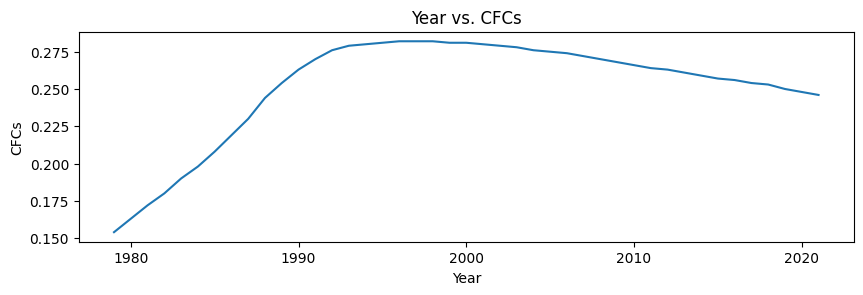

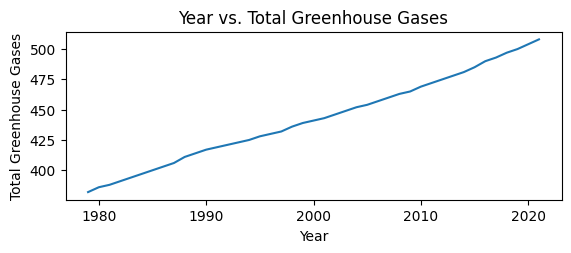

In [22]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Year'], data['CFCs'])
plt.title('Year vs. CFCs')
plt.xlabel('Year')
plt.ylabel('CFCs')
plt.show()
plt.subplot(2, 1, 2)
plt.plot(data['Year'], data['Total_Greenhouse_Gases_Concentration'])
plt.title('Year vs. Total Greenhouse Gases')
plt.xlabel('Year')
plt.ylabel('Total Greenhouse Gases')
plt.show()


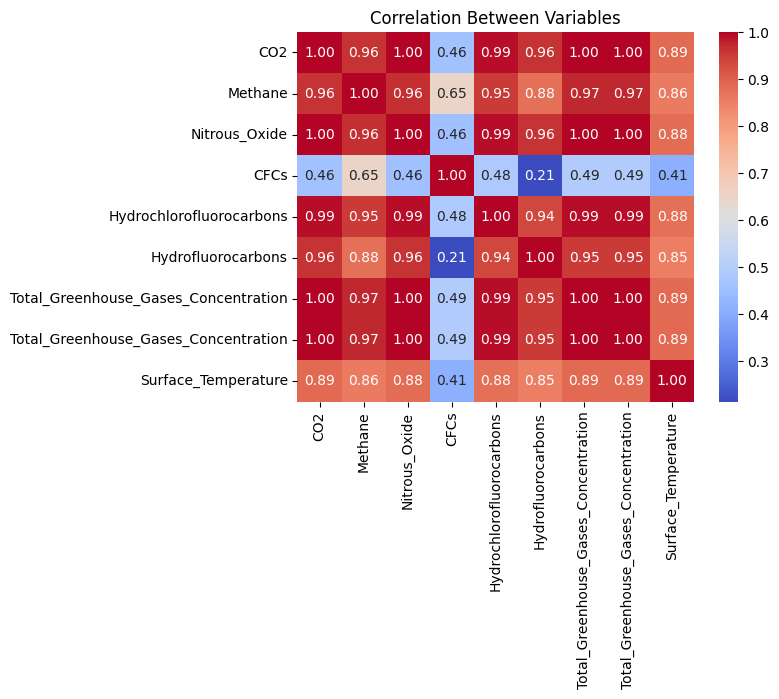

In [23]:
import seaborn as sns

# Select the variables for correlation analysis
correlation_variables = ['CO2', 'Methane', 'Nitrous_Oxide', 'CFCs', 'Hydrochlorofluorocarbons', 'Hydrofluorocarbons', 'Total_Greenhouse_Gases_Concentration', 'Total_Greenhouse_Gases_Concentration', 'Surface_Temperature']

# Compute the correlation matrix
correlation_matrix = data[correlation_variables].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables')
plt.show()


# Data Modeling with AI

## LSTM Model

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsoluteError

# Assuming you have your time series data stored in a pandas DataFrame named 'data' with columns: Year, CO2, Methane, Nitrous_Oxide, CFCs, ...

# Extract the variables for prediction
target_variables = ['CO2', 'Methane', 'Nitrous_Oxide', 'CFCs',
       'Hydrochlorofluorocarbons', 'Hydrofluorocarbons',
       'Total_Greenhouse_Gases_Heat', 'Total_Greenhouse_Gases_Concentration',
       'Increase_Since_1990', 'Change_In_Temperature_Since_1967', 'Surface_Temperature', 'CO2_Concentration']

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[target_variables])

# Define the number of time steps (lags) to consider
time_steps = 1

# Prepare the training data
train_data = data_scaled[data['Year'] < 2012]
X_train = []
y_train = []
for i in range(time_steps, len(data_scaled)):
    X_train.append(data_scaled[i - time_steps:i])
    y_train.append(data_scaled[i])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Prepare the test data
test_data = data_scaled[data['Year'] >= 2012]
X_test = []
y_test = []
for i in range(0, len(test_data)):
    val=i+len(train_data)
    X_test.append(data_scaled[val - time_steps:val])
    y_test.append(test_data[i])

X_test = np.array(X_test)
y_test = np.array(y_test)


In [25]:
y_test.shape,y_train.shape

((12, 12), (44, 12))

### LSTM Training

In [26]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(target_variables), activation='linear'))  # Adjust the output dimension based on the number of target variables

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[MeanAbsoluteError()])

# Train the model
history=model.fit(X_train, y_train, epochs=500, batch_size=16)


Epoch 1/500
3/3 [==============================] - 1s 2ms/step - loss: 0.3544 - mean_absolute_error: 0.5148
Epoch 2/500
3/3 [==============================] - 0s 2ms/step - loss: 0.3368 - mean_absolute_error: 0.4970
Epoch 3/500
3/3 [==============================] - 0s 2ms/step - loss: 0.3206 - mean_absolute_error: 0.4781
Epoch 4/500
3/3 [==============================] - 0s 2ms/step - loss: 0.3064 - mean_absolute_error: 0.4588
Epoch 5/500
3/3 [==============================] - 0s 2ms/step - loss: 0.2925 - mean_absolute_error: 0.4362
Epoch 6/500
3/3 [==============================] - 0s 7ms/step - loss: 0.2818 - mean_absolute_error: 0.4140
Epoch 7/500
3/3 [==============================] - 0s 2ms/step - loss: 0.2755 - mean_absolute_error: 0.3980
Epoch 8/500
3/3 [==============================] - 0s 2ms/step - loss: 0.2684 - mean_absolute_error: 0.3878
Epoch 9/500
3/3 [==============================] - 0s 2ms/step - loss: 0.2591 - mean_absolute_error: 0.3812
Epoch 10/500
3/3 [==========

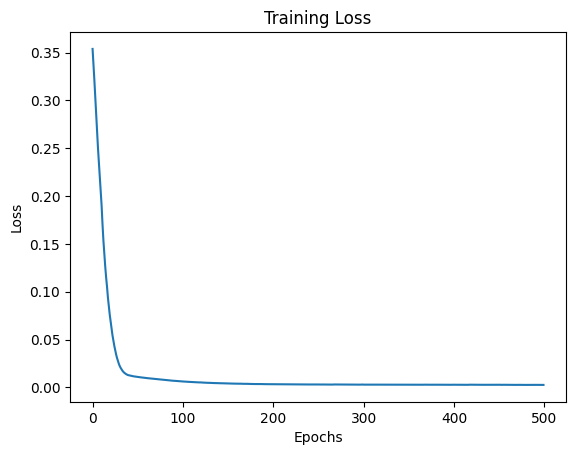

In [105]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### LSTM Predictions

In [27]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Inverse scale the predictions
y_pred = scaler.inverse_transform(y_pred)



1/1 [==============================] - 0s 161ms/step


In [107]:
print(y_pred)

[[1.8614221e+00 4.9629214e-01 1.8216828e-01 2.6262671e-01 4.8946254e-02
  2.5167169e-02 2.8735080e+00 4.7488919e+02 1.3353871e+00 1.6295309e+00
  7.8502709e-01 3.9441257e+02]
 [1.8923149e+00 4.9874228e-01 1.8493210e-01 2.6111892e-01 5.0045900e-02
  2.7213963e-02 2.9093497e+00 4.7797498e+02 1.3496344e+00 1.6762893e+00
  8.0708498e-01 3.9659393e+02]
 [1.9215698e+00 5.0182396e-01 1.8690938e-01 2.5938883e-01 5.1859546e-02
  2.7717983e-02 2.9415441e+00 4.8251300e+02 1.3633550e+00 1.6367193e+00
  8.2728010e-01 3.9958298e+02]
 [1.9548252e+00 5.0378680e-01 1.9029295e-01 2.5797424e-01 5.2467011e-02
  3.0871147e-02 2.9799094e+00 4.8455502e+02 1.3777068e+00 1.7463057e+00
  8.5126698e-01 4.0115802e+02]
 [1.9908907e+00 5.0699335e-01 1.9312882e-01 2.5604615e-01 5.4085385e-02
  3.2509774e-02 3.0193465e+00 4.8886948e+02 1.3933928e+00 1.7601317e+00
  8.7647730e-01 4.0407919e+02]
 [2.0085697e+00 5.1057196e-01 1.9545059e-01 2.5252211e-01 5.5593353e-02
  3.4886226e-02 3.0633473e+00 4.9379285e+02 1.4146175

In [108]:
# Convert the values to a more readable format
formatted_values = [f'{value:.2f}' for value in y_pred[3]]

# Print the formatted values
print(formatted_values)

['1.95', '0.50', '0.19', '0.26', '0.05', '0.03', '2.98', '484.56', '1.38', '1.75', '0.85', '401.16']


In [109]:
# Inverse scale the predictions
yy = scaler.inverse_transform(y_test)
yy = [f'{value:.2f}' for value in yy[3]]
# Print the formatted values
print(yy)

['1.94', '0.50', '0.19', '0.26', '0.05', '0.03', '2.98', '485.00', '1.38', '1.80', '0.81', '401.01']


In [ ]:
# model = 

### Predict any Year Value

In [28]:
# Preprocess the input for prediction
input_year = 2050

prediction_val = []
if input_year>2021:
  # Prepare the input data
  input_data = data[data['Year'] <= 2021]
  input_data_scaled = scaler.transform(input_data[target_variables])
  # Prepare the input sequence
  input_sequences = []
  for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
      input_sequences.append(input_data_scaled[i - time_steps:i])

  for year in range(2022, input_year + 1):
      input_sequences_array = np.array([sequence for sequence in input_sequences if len(sequence) == time_steps])
      input_sequence_reshaped = np.reshape(input_sequences_array, (input_sequences_array.shape[0], input_sequences_array.shape[1], len(target_variables)))

      # Make predictions for the input sequence
      predictions = model.predict(input_sequence_reshaped[-1].reshape(1, time_steps, len(target_variables)))

      # Inverse transform the predicted values
      prediction = scaler.inverse_transform(predictions)

      # Get the predicted values for the current year
      predicted_values = prediction[0]
      
      # Append the predicted values to the results
      prediction_val.append(predicted_values)
      # for variable, value in zip(target_variables, prediction_val[-1]):
      #   print(f"{variable}: {value}")
      # Update the input sequence for the next iteration
      input_sequences[0][:-1] = input_sequences[0][1:]  # Remove the first value
      input_sequences[0][-1] = np.array(predictions)  # Add predictions at the last index

else:
      input_data = data[data['Year'] < input_year]
      input_data_scaled = scaler.transform(input_data[target_variables])
      print("h1")
      # Prepare the input sequence
      input_sequence = []
      for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
          input_sequence.append(input_data_scaled[i - time_steps:i])

      input_sequence = np.array(input_sequence)

      # Reshape the input sequence for LSTM (input_shape: [samples, time_steps, features])
      input_sequence = np.reshape(input_sequence, (input_sequence.shape[0], input_sequence.shape[1], len(target_variables)))

      # Make predictions for the input sequence
      predictions = model.predict(input_sequence)

      # Inverse transform the predicted values
      prediction_val = scaler.inverse_transform(predictions)

      # Get the predicted values for the year 2022
      predicted_values = prediction_val[-1]
print("Predictions for year: ",input_year)
for variable, value in zip(target_variables, prediction_val[-1]):
    print(f"{variable}: {value}")

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 10ms/step
Predictions for year:  2050
CO2: 2.187946081161499
Methane: 0.5242138504981995
Nitrous_Oxide: 0.21008417010307312
CFCs: 0.2484266757965088
Hydrochlorofluorocarbons: 0.061660658568143845
Hydrofluorocarbons: 0.04110779985785484
Total_Greenhouse_Gases_Heat: 3.268831491470337
Total_Greenhouse_Gases_Concentration: 506.20654296875
Increase_Since_1990: 1.4871435165405273
Change_In_Temperature_Since_1967: 1.8332741260528564
Surface_Temperature: 0.9885294437408447
CO2_Concentration: 418.5740051269531


In [29]:
#@title Click `Show code` in the code cell. { display-mode: "form" }
import numpy as np

# Preprocess the input for prediction
Please_Input_A_Year = "2050" #@param {type:"string"}
input_year = int(Please_Input_A_Year)

def convert_watt_per_m2_to_joule_per_year(watt_per_m2):
    total_surface_area_earth_m2 = 5.1 * 10**14
    seconds_per_year = 60 * 60 * 24 * 365
    joules_per_year = watt_per_m2 * total_surface_area_earth_m2 * seconds_per_year
    return joules_per_year

def get_predictions(input_year):
    prediction_val = []
    if input_year > 2021:
        input_data = data[data['Year'] <= 2021]
        input_data_scaled = scaler.transform(input_data[target_variables])
        # Preparing input sequence and other parts of your code

        # Making predictions and inverse transforming the predicted values
        predictions = model.predict(input_sequence_reshaped[-1].reshape(1, time_steps, len(target_variables)))
        prediction = scaler.inverse_transform(predictions)
        predicted_values = prediction[0]

        prediction_val.append(predicted_values)
        # Updating input sequence for the next iteration and other parts of your code
    else:
        input_data = data[data['Year'] < input_year]
        input_data_scaled = scaler.transform(input_data[target_variables])
        # Preparing input sequence and other parts of your code

        # Making predictions and inverse transforming the predicted values
        predictions = model.predict(input_sequence)
        prediction_val = scaler.inverse_transform(predictions)
        predicted_values = prediction_val[-1]

    return predicted_values

# Variables to convert to joules
variables_to_convert = ["CO2", "Methane", "Nitrous_Oxide", "CFCs", "Hydrochlorofluorocarbons", "Hydrofluorocarbons", "Total_Greenhouse_Gases_Heat"]

# Get predictions
predictions = get_predictions(input_year)

# Handle unit conversions
for i, (variable, value) in enumerate(zip(target_variables, predictions)):
    if variable in variables_to_convert:
        predictions[i] = convert_watt_per_m2_to_joule_per_year(value)

print("Predictions for year: ", input_year)
for variable, value in zip(target_variables, predictions):
    if variable in variables_to_convert:
        print(f"{variable}: {value} joules per year")
    elif variable == "Total_Greenhouse_Gases_Concentration" or variable == "CO2_Concentration":
        print(f"{variable}: {value} ppm")
    elif variable == "Increase_Since_1990":
        print(f"{variable}: {value} AGGI")
    elif variable == "Change_In_Temperature_Since_1967":
        print(f"{variable}: {value} % change per year")
    elif variable == "Surface_Temperature":
        print(f"{variable}: {value} ºC")

1/1 [==============================] - 0s 10ms/step
Predictions for year:  2050
CO2: 3.4423567744781234e+22 joules per year
Methane: 8.350694900360406e+21 joules per year
Nitrous_Oxide: 3.3274178751132105e+21 joules per year
CFCs: 3.937288581252282e+21 joules per year
Hydrochlorofluorocarbons: 9.377799060702427e+20 joules per year
Hydrofluorocarbons: 7.076211249449156e+20 joules per year
Total_Greenhouse_Gases_Heat: 5.155554220227531e+22 joules per year
Total_Greenhouse_Gases_Concentration: 506.4592590332031 ppm
Increase_Since_1990: 1.4967350959777832 AGGI
Change_In_Temperature_Since_1967: 1.787348985671997 % change per year
Surface_Temperature: 0.9602525234222412 ºC
CO2_Concentration: 416.77056884765625 ppm


In [112]:
prediction_val

array([[2.0814841e+00, 5.2143091e-01, 2.0531031e-01, 2.4744231e-01,
        5.9467632e-02, 4.2785902e-02, 3.2283406e+00, 5.0795450e+02,
        1.4747249e+00, 1.8973473e+00, 9.5165306e-01, 4.1537769e+02]],
      dtype=float32)

### Actual and predicted values Graph

In [30]:
# Prepare the data for prediction
X_all = []
y_all=[]
for i in range(time_steps, len(data_scaled)):
    X_all.append(data_scaled[i - time_steps:i])
    y_all.append(data_scaled[i])

X_all = np.array(X_all)
y_all = np.array(y_all)
# Make predictions on all data
y_pred_all = model.predict(X_all)

# Denormalize the predicted values
y_pred_all_denormalized = scaler.inverse_transform(y_pred_all)
y_all_denormalized = scaler.inverse_transform(y_all)



2/2 [==============================] - 0s 2ms/step


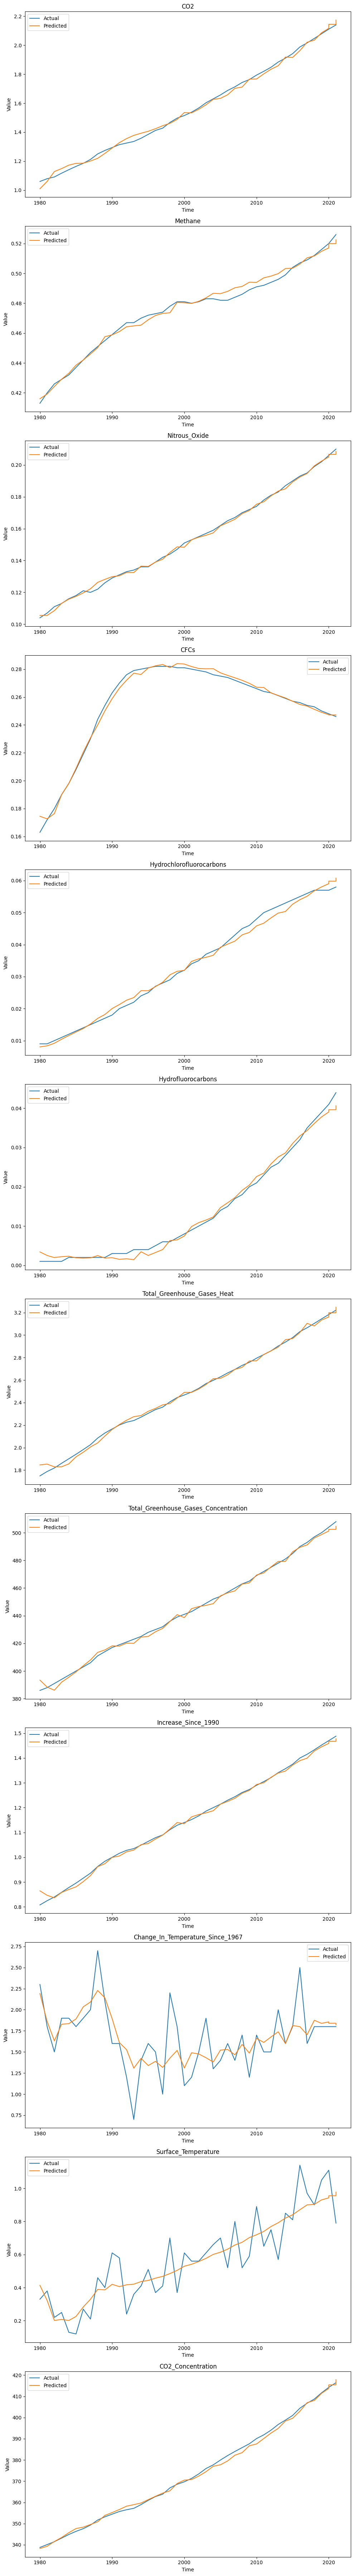

In [31]:
# Plot actual vs predicted for each target variable
fig, axes = plt.subplots(len(target_variables), 1, figsize=(10, 6 * len(target_variables)))

for i, target_variable in enumerate(target_variables):
    axes[i].plot(data['Year'][time_steps:], data[target_variable][time_steps:], label='Actual')
    axes[i].plot(data['Year'][time_steps:], y_pred_all_denormalized[:, i], label='Predicted')
    axes[i].set_title(target_variable)
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Value')
    axes[i].legend()

plt.tight_layout()
plt.show()


In [115]:
X_train.shape

(44, 1, 12)

## ANN Model

In [126]:
from tensorflow.keras.layers import Flatten

# Build the ANN model
ANN_Model = Sequential()
ANN_Model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
ANN_Model.add(Dense(256, activation='relu'))
ANN_Model.add(Dense(128, activation='relu'))
ANN_Model.add(Dense(64, activation='relu'))
ANN_Model.add(Dense(32, activation='relu'))
ANN_Model.add(Dense(16, activation='relu'))
ANN_Model.add(Dense(X_train.shape[2], activation='linear'))  # Adjust the output dimension based on the number of features

# Compile the model
ANN_Model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[MeanAbsoluteError()])

# Train the model
history = ANN_Model.fit(X_train, y_train, epochs=300, batch_size=16)


Epoch 1/300
3/3 [==============================] - 1s 6ms/step - loss: 0.3531 - mean_absolute_error: 0.5121
Epoch 2/300
3/3 [==============================] - 0s 4ms/step - loss: 0.2881 - mean_absolute_error: 0.4547
Epoch 3/300
3/3 [==============================] - 0s 7ms/step - loss: 0.2379 - mean_absolute_error: 0.3969
Epoch 4/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1914 - mean_absolute_error: 0.3324
Epoch 5/300
3/3 [==============================] - 0s 6ms/step - loss: 0.1723 - mean_absolute_error: 0.3060
Epoch 6/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1678 - mean_absolute_error: 0.3047
Epoch 7/300
3/3 [==============================] - 0s 5ms/step - loss: 0.1500 - mean_absolute_error: 0.2888
Epoch 8/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1350 - mean_absolute_error: 0.2754
Epoch 9/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1256 - mean_absolute_error: 0.2699
Epoch 10/300
3/3 [==========

In [127]:
ANN_Model.save("my_h5_model.h5")

### ANN Predictions

In [128]:
# Make predictions on the test data
y_pred = ANN_Model.predict(X_test)

# Denormalize the predicted and actual values
y_pred = scaler.inverse_transform(y_pred)


1/1 [==============================] - 0s 81ms/step


In [129]:
# Convert the values to a more readable format
formatted_values = [f'{value:.2f}' for value in y_pred[1]]

# Print the formatted values
print(formatted_values)

['1.88', '0.50', '0.19', '0.26', '0.05', '0.03', '2.89', '475.85', '1.34', '1.73', '0.79', '397.40']


In [130]:
# # Inverse scale the predictions
yy = scaler.inverse_transform(y_test)
yy = [f'{value:.2f}' for value in yy[1]]
# Print the formatted values
print(yy)

['1.88', '0.50', '0.18', '0.26', '0.05', '0.03', '2.90', '478.00', '1.34', '2.00', '0.57', '396.74']


In [131]:
# Preprocess the input for prediction
#input_year = int(input("Please enter a year: "))
input_year = 2021

prediction_val = []
if input_year>2021:
  # Prepare the input data
  input_data = data[data['Year'] <= 2021]
  input_data_scaled = scaler.transform(input_data[target_variables])
  # Prepare the input sequence
  input_sequences = []
  for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
      input_sequences.append(input_data_scaled[i - time_steps:i])

  for year in range(2022, input_year + 1):
      input_sequences_array = np.array([sequence for sequence in input_sequences if len(sequence) == time_steps])
      input_sequence_reshaped = np.reshape(input_sequences_array, (input_sequences_array.shape[0], input_sequences_array.shape[1], len(target_variables)))

      # Make predictions for the input sequence
      predictions = ANN_Model.predict(input_sequence_reshaped[-1].reshape(1, time_steps, len(target_variables)))

      # Inverse transform the predicted values
      prediction = scaler.inverse_transform(predictions)

      # Get the predicted values for the current year
      predicted_values = prediction[0]
      
      # Append the predicted values to the results
      prediction_val.append(predicted_values)
      # for variable, value in zip(target_variables, prediction_val[-1]):
      #   print(f"{variable}: {value}")
      # Update the input sequence for the next iteration
      input_sequences[0][:-1] = input_sequences[0][1:]  # Remove the first value
      input_sequences[0][-1] = np.array(predictions)  # Add predictions at the last index

else:
      input_data = data[data['Year'] < input_year]
      input_data_scaled = scaler.transform(input_data[target_variables])
      print("h1")
      # Prepare the input sequence
      input_sequence = []
      for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
          input_sequence.append(input_data_scaled[i - time_steps:i])

      input_sequence = np.array(input_sequence)

      # Reshape the input sequence for LSTM (input_shape: [samples, time_steps, features])
      input_sequence = np.reshape(input_sequence, (input_sequence.shape[0], input_sequence.shape[1], len(target_variables)))

      # Make predictions for the input sequence
      predictions = model.predict(input_sequence)

      # Inverse transform the predicted values
      prediction_val = scaler.inverse_transform(predictions)

      # Get the predicted values for the year 2022
      predicted_values = prediction_val[-1]
print("Predictions for year: ",input_year)
for variable, value in zip(target_variables, prediction_val[-1]):
    print(f"{variable}: {value}")

h1
1/1 [==============================] - 0s 23ms/step
Predictions for year:  2021
CO2: 2.081484079360962
Methane: 0.5214309096336365
Nitrous_Oxide: 0.20531031489372253
CFCs: 0.2474423050880432
Hydrochlorofluorocarbons: 0.059467632323503494
Hydrofluorocarbons: 0.042785901576280594
Total_Greenhouse_Gases_Heat: 3.2283406257629395
Total_Greenhouse_Gases_Concentration: 507.9544982910156
Increase_Since_1990: 1.4747248888015747
Change_In_Temperature_Since_1967: 1.897347331047058
Surface_Temperature: 0.9516530632972717
CO2_Concentration: 415.377685546875


In [133]:
#@title Click `Show code` in the code cell. { display-mode: "form" }
# Preprocess the input for prediction
input_year = 2050 #@param {type:"string"}

def convert_watt_per_m2_to_joule_per_year(watt_per_m2):
    total_surface_area_earth_m2 = 5.1 * 10**14  # Total surface area of the Earth in m²
    seconds_per_year = 60 * 60 * 24 * 365  # Number of seconds in a year

    joules_per_year = watt_per_m2 * total_surface_area_earth_m2 * seconds_per_year
    return joules_per_year

def get_predictions(input_year):
    prediction_val = []
    if input_year > 2021:
        input_data = data[data['Year'] <= 2021]
        input_data_scaled = scaler.transform(input_data[target_variables])

        input_sequences = []
        for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
            input_sequences.append(input_data_scaled[i - time_steps:i])

        for year in range(2022, input_year + 1):
            input_sequences_array = np.array([sequence for sequence in input_sequences if len(sequence) == time_steps])
            input_sequence_reshaped = np.reshape(input_sequences_array, (input_sequences_array.shape[0], input_sequences_array.shape[1], len(target_variables)))

            predictions = ANN_Model.predict(input_sequence_reshaped[-1].reshape(1, time_steps, len(target_variables)))
            prediction = scaler.inverse_transform(predictions)
            predicted_values = prediction[0]

            prediction_val.append(predicted_values)
            input_sequences[0][:-1] = input_sequences[0][1:]  # Remove the first value
            input_sequences[0][-1] = np.array(predictions)  # Add predictions at the last index
    else:
        input_data = data[data['Year'] < input_year]
        input_data_scaled = scaler.transform(input_data[target_variables])

        input_sequence = []
        for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
            input_sequence.append(input_data_scaled[i - time_steps:i])

        input_sequence = np.array(input_sequence)
        input_sequence = np.reshape(input_sequence, (input_sequence.shape[0], input_sequence.shape[1], len(target_variables)))

        predictions = model.predict(input_sequence)
        prediction_val = scaler.inverse_transform(predictions)
        predicted_values = prediction_val[-1]

    return predicted_values

# Variables to convert to joules
variables_to_convert = ["CO2", "Methane", "Nitrous_Oxide", "CFCs", "Hydrochlorofluorocarbons", "Hydrofluorocarbons", "Total_Greenhouse_Gases_Heat"]

# Get predictions
predictions = get_predictions(input_year)

# Handle unit conversions
for i, (variable, value) in enumerate(zip(target_variables, predictions)):
    if variable in variables_to_convert:
        predictions[i] = convert_watt_per_m2_to_joule_per_year(value)

print("Predictions for year: ", input_year)
for variable, value in zip(target_variables, predictions):
    if variable in variables_to_convert:
        print(f"{variable}: {value} joules per year")
    elif variable == "Total_Greenhouse_Gases_Concentration" or variable == "CO2_Concentration":
        print(f"{variable}: {value} ppm")
    elif variable == "Increase_Since_1990":
        print(f"{variable}: {value} AGGI")
    elif variable == "Change_In_Temperature_Since_1967":
        print(f"{variable}: {value} % change per year")
    elif variable == "Surface_Temperature":
        print(f"{variable}: {value} ºC")

1/1 [==============================] - 0s 19ms/step
Predictions for year:  2050
CO2: 3.5231083424167087e+22 joules per year
Methane: 8.46950492508002e+21 joules per year
Nitrous_Oxide: 3.366476468781488e+21 joules per year
CFCs: 3.9892077666064694e+21 joules per year
Hydrochlorofluorocarbons: 9.549695828979624e+20 joules per year
Hydrofluorocarbons: 7.006328049606318e+20 joules per year
Total_Greenhouse_Gases_Heat: 5.2164100109123e+22 joules per year
Total_Greenhouse_Gases_Concentration: 511.9231872558594 ppm
Increase_Since_1990: 1.51076340675354 AGGI
Change_In_Temperature_Since_1967: 1.794015645980835 % change per year
Surface_Temperature: 0.9688960909843445 ºC
CO2_Concentration: 418.3594055175781 ppm


In [34]:
import numpy as np
import math
from pickle import dump, load
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd

#Least Squares Regression

In [56]:


# Read CO2 Emissions data
co2_url = 'https://raw.githubusercontent.com/osanan25/ClimateChangePrediction/main/CO2Data.csv'
co2Data2 = pd.read_csv(co2_url)
co2List = co2Data2.values.tolist()

# Read Greenhouse Gases data
gg_url = 'https://raw.githubusercontent.com/osanan25/ClimateChangePrediction/main/GreenhouseGasses.csv'
ggData2 = pd.read_csv(gg_url)
ggList = ggData2.values.tolist()

# Read Surface Temperature Change data
temp_url = 'https://raw.githubusercontent.com/osanan25/ClimateChangePrediction/main/TempData.csv'
tempData2 = pd.read_csv(temp_url)
tempList = tempData2.values.tolist()
def convert_watt_per_m2_to_joule_per_year(watt_per_m2):
    # Constants
    total_surface_area_earth_m2 = 5.1 * 10**14  # Total surface area of the Earth in m²
    seconds_per_year = 60 * 60 * 24 * 365  # Number of seconds in a year

    # Conversion
    joules_per_year = watt_per_m2 * total_surface_area_earth_m2 * seconds_per_year

    return joules_per_year

def polynomial_regression(x_coordinates, y_coordinates, degree=2):
    # Fit a polynomial of the specified degree to the data
    coefficients = np.polyfit(x_coordinates, y_coordinates, degree)

    # Save coefficients
    # dump(coefficients, open('coefficients.pkl', 'wb'))

    # Load coefficients
    # loaded_coefficients = load(open('coefficients.pkl', 'rb'))

    # Return the polynomial function
    return coefficients

#@title Click `Show code` in the code cell. { display-mode: "form" }
input_year = "2050" #@param {type:"string"}

#Reads the year
year = str(input_year)
print("In the year "+year+" our model predicts that:")
units = ["years","joules per year","joules per year","joules per year","joules per year","joules per year","joules per year","joules per year","ppm","AGGI","% change per year","","ppm"]

#Reads the degree
input_degree = "3" #@param {type:"string"}
degree = int(input_degree)

#Finds all of the x values within the given range
yValues = []
for index in range(1, len(df_list)):
    yValues.append(df_list[index][0])
yValues = np.array(yValues)  # Convert yValues to a numpy array
all_coeff = []
#Iterates through every x values to predict each indicator
for index1 in range(1, len(df_list[0])):
    xValues = []
    prediction = 0
    #finds all of the known x-values
    for index2 in range(1, len(df_list)):
        xValues.append(df_list[index2][index1])
    xValues = np.array(xValues)  # Convert xValues to a numpy array
    line = polynomial_regression(yValues, xValues,degree)
    # all_coeff.append(line)
    #Uses the polynomial function to predict the indicator
    for index2 in range(0,degree+1):
      prediction+=line[len(line)-index2-1]*float(year)**index2
    #Finds the appropriate units and prints the information to the module
    if(units[index1]=="joules per year"):
      prediction = convert_watt_per_m2_to_joule_per_year(prediction)
    print(str(df_list[0][index1])+" = "+str(round(prediction,3-int(math.floor(math.log10(abs(prediction))))))+" "+str(units[index1]))

# all_coeff_array = np.vstack(all_coeff)
    

In the year 2050 our model predicts that:
CO2 = 5.541e+22 joules per year
Methane = 1.507e+22 joules per year
Nitrous_Oxide = 5.89e+21 joules per year
CFCs = 8.409e+21 joules per year
Hydrochlorofluorocarbons = 1.66e+20 joules per year
Hydrofluorocarbons = 2.683e+21 joules per year
Total_Greenhouse_Gases_Heat = 8.757e+22 joules per year
Total_Greenhouse_Gases_Concentration = 717.0 ppm
Increase_Since_1990 = 2.52 AGGI
Change_In_Temperature_Since_1967 = 4.504 % change per year
Surface_Temperature = 2.103 
CO2_Concentration = 528.1 ppm


In [61]:
dump(all_coeff_array, open('coefficients.pkl', 'wb'))

In [20]:
calculated_coefficients = np.polyfit(yValues, xValues, 3)
calculated_coefficients

array([ 2.30160257e-04, -1.36508206e+00,  2.70019537e+03, -1.78097439e+06])

In [35]:
loaded_coefficients = load(open('coefficients.pkl', 'rb'))
loaded_coefficients

array([[ 2.00271798e-06, -1.18578672e-02,  2.34244342e+01,
        -1.54376236e+04],
       [ 3.79968677e-06, -2.28287974e-02,  4.57201581e+01,
        -3.05221424e+04],
       [ 4.97394312e-07, -2.96878141e-03,  5.90870123e+00,
        -3.92128159e+03],
       [ 5.95250459e-06, -3.59144090e-02,  7.22274807e+01,
        -4.84170799e+04],
       [-8.38765339e-07,  5.03452011e-03, -1.00713421e+01,
         6.71475905e+03],
       [ 2.55639128e-07, -1.50127991e-03,  2.93835125e+00,
        -1.91668752e+03],
       [ 1.16719943e-05, -7.00550085e-02,  1.40187548e+02,
        -9.35285452e+04],
       [ 9.98704650e-04, -5.98338397e+00,  1.19516612e+04,
        -7.95898261e+06],
       [ 5.43186423e-06, -3.26015920e-02,  6.52385062e+01,
        -4.35244169e+04],
       [ 4.01946401e-06, -2.30313542e-02,  4.38876226e+01,
        -2.78040411e+04],
       [ 2.78792266e-06, -1.65963085e-02,  3.29479458e+01,
        -2.18135014e+04],
       [ 2.30160257e-04, -1.36508206e+00,  2.70019537e+03,
      

In [55]:
np.vstack([calculated_coefficients, loaded_coefficients])

array([[ 2.30160257e-04, -1.36508206e+00,  2.70019537e+03,
        -1.78097439e+06],
       [ 2.30160257e-04, -1.36508206e+00,  2.70019537e+03,
        -1.78097439e+06]])

In [30]:
class LSRM:
    def __init__(self, coeff: np.ndarray, degree: int = 3):
        self.coeff = coeff
        self.degree = degree

    def convert_watt_per_m2_to_joule_per_year(self, watt_per_m2):
        # Constants
        total_surface_area_earth_m2 = 5.1 * 10**14  # Total surface area of the Earth in m²
        seconds_per_year = 60 * 60 * 24 * 365  # Number of seconds in a year
        # Conversion
        joules_per_year = watt_per_m2 * total_surface_area_earth_m2 * seconds_per_year
        return joules_per_year

    def predict(self, year: int):
        all_predictions = []
        for c in range(12):
            prediction = 0
            coeff = self.coeff[c]
            for index2 in range(self.degree+1):
                prediction+=coeff[len(coeff)-index2-1]*float(year)**index2
                converted_prediction = self.convert_watt_per_m2_to_joule_per_year(prediction)
            all_predictions.append(converted_prediction)
        return all_predictions

In [31]:
def create_lsrm(coeff: np.ndarray):
    return LSRM(coeff)

In [36]:
model_lsrm = create_lsrm(loaded_coefficients)

In [37]:
model_lsrm.predict(2050)

[5.541467252763443e+22,
 1.5069159402285526e+22,
 5.890494363454692e+21,
 8.409240647748426e+21,
 1.659776646233005e+20,
 2.682598917055431e+21,
 8.757469078108749e+22,
 1.1532495774958283e+25,
 4.052302776931266e+22,
 7.244393084772217e+22,
 3.382568009672768e+22,
 8.494008273533688e+24]

In [38]:
import os
from tensorflow.keras.models import load_model 
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [38]:
target_variables = ['CO2', 'Methane', 'Nitrous_Oxide', 'CFCs',
                    'Hydrochlorofluorocarbons', 'Hydrofluorocarbons',
                    'Total_Heat_Absorbed_GHG', 'Total_Greenhouse_Gases',
                    'GHG_Increase', '%_Change_GHG', 'Surface_Temperature', 'CO2_Concentration']
len(target_variables)

12

In [50]:
model_lstm = load_model('../Flask/Lstm.h5')  # Load the LSTM model
model = model_lstm
data_path = os.path.abspath('/Users/df/Desktop/code_source/JaiSanan_project/Flask/clean_data.csv')
data = pd.read_csv(data_path)

In [51]:

data_scaled = scaler.fit_transform(data[target_variables])
input_data = data[data['Year'] <= 2021]
input_data_scaled = scaler.transform(input_data[target_variables])
time_steps = 1
# Prepare the input sequence
input_sequences = []
for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
    input_sequences.append(input_data_scaled[i - time_steps:i])
input_sequences_array = np.array([sequence for sequence in input_sequences if len(sequence) == time_steps])
input_sequence_reshaped = np.reshape(input_sequences_array, (input_sequences_array.shape[0], input_sequences_array.shape[1], len(target_variables)))

prediction = model.predict(input_sequence_reshaped[-1].reshape(1, time_steps, len(target_variables)))

1/1 [==============================] - 0s 179ms/step


In [52]:
prediction

array([[1.0436145 , 1.0402651 , 1.0424888 , 0.7356428 , 1.0348806 ,
        1.0527449 , 1.0234598 , 1.0489725 , 1.0101761 , 0.526469  ,
        0.89156055, 1.0672671 ]], dtype=float32)